In [1]:
# import libs && tools
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from pandas import Series
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
# import and handle data
df = pd.read_csv('../data/20190606180000-20190606190000.csv')
df=df.replace([np.inf, -np.inf], np.nan)
df=df.dropna();
df=df.round(decimals=5)  # round to one decimal after precision of devices
df['diff'] = (df['B_VIMIN'] - df['B:VIMIN'])
df2= pd.DataFrame({'diff' : df['diff'], 'err' : df['B:IMINER']})

# define period of TLG
horizon = 60.066; # unit: sec. horizon of TLG..61.-- sec
cycle   = 15; # 15Hz sampling
supercycle = 901; # number of time steps per supercycle (60.066 sec)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (77,79,81,83,85,87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The following cell is the eq(1) from Rachael's report, showing the current regulator rules. 2 constances of alpha and gamma are currently fixed.  And we will use RL to dynamically change them. 

Text(0.5, 1.0, 'error=8.821850727990144e-05')

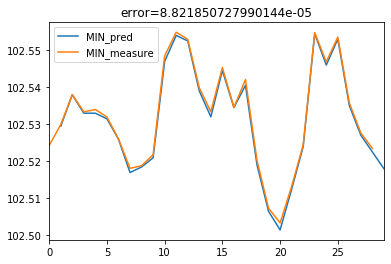

In [13]:
alpha = 10e-2
gamma = 7.535e-5

## calculate the prediction with current regulation rules
beta=[0]
ER = df["B:IMINER"] #error
_MIN = df["B_VIMIN"] #setting
for i in range(len(_MIN)):
    if i>0:
        beta_t = beta[-1] + gamma*ER[i]
        beta.append(beta_t)
MIN_pred = _MIN - alpha * ER - beta #predict the next, shiftting happens in the plotting

## actual measurements
MIN = df["B:VIMIN"]

## calculate error
error = (MIN[:plotLen-1]-MIN_pred[1:plotLen]).sem()

## plotting
plotLen = cycle*2#cycle = 1 sec/15 samples; supercycle = 60 cycles
MIN_pred[1:plotLen].plot(label="MIN_pred")
MIN[:plotLen-1].plot(label="MIN_measure")
plt.legend()
plt.title("error="+str(error))